In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma, expon, dirichlet, beta

In [7]:
df = pd.read_csv('baseball75.csv')
print(df.describe())
df.head()

         AB       Hits  RemainingAB  RemainingHits
count  18.0  18.000000    18.000000      18.000000
mean   45.0  11.944444   387.222222     108.444444
std     0.0   3.133730   161.010615      51.150553
min    45.0   7.000000    70.000000      14.000000
25%    45.0  10.000000   275.500000      64.000000
50%    45.0  11.000000   422.000000     127.000000
75%    45.0  14.000000   518.250000     140.750000
max    45.0  18.000000   591.000000     195.000000


,Player,AB,Hits,RemainingAB,RemainingHits
0,Clemente,45,18,367,127
1,Robinson,45,17,426,127
2,Howard,45,16,521,144
3,Johnstone,45,15,275,61
4,Berry,45,14,418,114


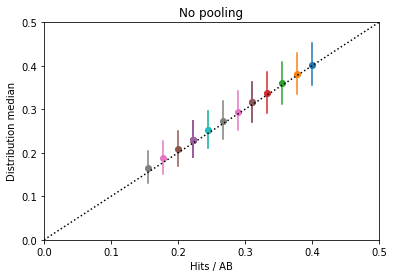

In [66]:
for p in df.values:
    a = 1 + p[2]
    b = 1 + p[1] - p[2]
    avg = p[2] / p[1]
    median = beta.median(a, b)
    quantiles = beta.ppf([0.25, 0.75], a, b)
    plt.plot([avg, avg], quantiles)
    plt.scatter(avg, median)
    plt.ylim(0, .5)
    plt.xlim(0, .5)
    plt.title('No pooling')
    plt.xlabel('Hits / AB')
    plt.ylabel('Distribution median')
    
plt.plot([0, 1], [0, 1], linestyle=':', color='black')
plt.show()

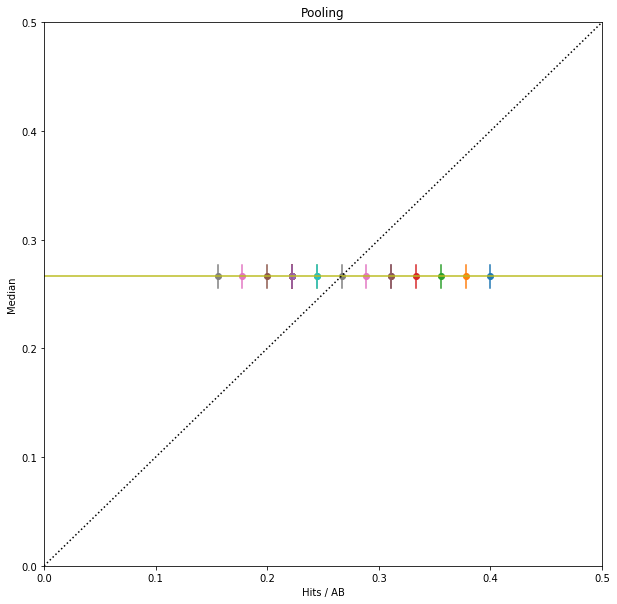

In [82]:
median = np.sum(df['Hits']) / len(df['Hits'])
a = np.sum(df['Hits']) + 1
b = np.sum(df['AB']) - a + 1
plt.figure(figsize=(10,10))

for p in df.values:
    avg = p[2] / p[1]
    quantiles = beta.ppf([0.25, 0.75], a, b)
    plt.plot([avg, avg], quantiles)
    median = beta.median(a, b)
    plt.scatter(avg, median)
    plt.ylim(0, .5)
    plt.xlim(0, .5)
    plt.title('Pooling')
    plt.xlabel('Hits / AB')
    plt.ylabel('Median')
    
plt.plot([0, 1], [median, median])
plt.plot([0, 1], [0, 1], linestyle=':', color='black')
plt.show()